# Creating Hashtag Map 

In [1]:
! pip install pandas

In [5]:
! pip3 install wordcloud

In [3]:
! pip install matplotlib

In [9]:
import sys
print(sys.executable)

/usr/local/bin/python3


In [10]:
!/usr/local/bin/python3 -m pip install wordcloud

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 174kB 478kB/s ta 0:00:01
tensorflow 2.11.0 has requirement protobuf<3.20,>=3.9.2, but you'll have protobuf 4.24.4 which is incompatible.
tensorboard 2.11.2 has requirement protobuf<4,>=3.9.2, but you'll have protobuf 4.24.4 which is incompatible.
rasa 3.5.6 has requirement prompt-toolkit<3.0.29,>=3.0, but you'll have prompt-toolkit 3.0.45 which is incompatible.
rasa 3.5.6 has requirement protobuf<3.20,>=3.9.2, but you'll have protobuf 4.24.4 which is incompatible.
rasa-sdk 3.5.1 has requirement prompt-toolkit<3.0.29,>=3.0, but you'll have prompt-toolkit 3.0.45 which is incompatible.
botocore 1.29.127 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 2.0.2 which is incompatible.
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [90]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import ast
import numpy as np
from PIL import Image
import re


In [82]:
df = pd.read_csv('users_vids_short.csv')
# df = pd.read_csv('sug_users_vids1.csv')
# df = pd.read_csv('sug_users_vids_all.csv')

In [83]:
df

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
0,6892428462015958273,1604768557,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,6891790235336822018,1604619960,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,6891264678832475393,1604497592,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211
3,6891050048403049730,1604447622,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,1000000,4700000,211
4,6890886086613126402,1604409445,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,1000000,4700000,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6856110852685270277,1596312708,mrbeast,[],original sound,9,864000,1583,7781,5200000,12600000,141000000,129
96,6855010763086548229,1596056570,mrbeast,[],original sound,18,1200000,1402,9295,6500000,12600000,141000000,129
97,6853871816675429638,1595791388,mrbeast,[],original sound,18,1300000,1358,13600,6500000,12600000,141000000,129
98,6851992917385432326,1595353928,mrbeast,[],Trap Sax,10,2200000,3788,11600,15600000,12600000,141000000,129


#### Get Tops Accounts in Data Set

In [84]:
df.user_name.value_counts()

shaq                       25
john.cena10                25
lazarbeam                  25
mrbeast                    22
robertdowneyjnrofficial     3
Name: user_name, dtype: int64

#### Preprocessing Data

In [85]:
df['hashtags'] = df['hashtags'].apply(ast.literal_eval)

In [86]:
df['hashtags'] = df['hashtags'].apply(lambda x: x if x != [] else ["NoHashtag"])

print(df)

                     id  create_time    user_name  \
0   6892428462015958273   1604768557  john.cena10   
1   6891790235336822018   1604619960  john.cena10   
2   6891264678832475393   1604497592  john.cena10   
3   6891050048403049730   1604447622  john.cena10   
4   6890886086613126402   1604409445  john.cena10   
..                  ...          ...          ...   
95  6856110852685270277   1596312708      mrbeast   
96  6855010763086548229   1596056570      mrbeast   
97  6853871816675429638   1595791388      mrbeast   
98  6851992917385432326   1595353928      mrbeast   
99  6851252392747371781   1595181506      mrbeast   

                                             hashtags  \
0    [johncena, love, tiktok, fyp, foryoupage, vibes]   
1   [johncena, love, tiktok, halloween, queen, rob...   
2                   [johncena, love, fyp, foryoupage]   
3   [johncena, fyp, foryoupage, viral, comedy, cha...   
4                  [johncena, foryoupage, fyp, viral]   
..                   

In [87]:
explodedDf = df['hashtags'].explode()


In [91]:
def removeSpecialCharacters(hashtags):
    processedHashtag = [re.sub(r'[^a-zA-Z0-9]', '', hashtag) for hashtag in hashtags]
    return processedHashtag

In [94]:
df['hashtags'] = df['hashtags'].apply(removeSpecialCharacters)
df.head()

,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
0,1604768557,john.cena10,"[johncena, love, tiktok, fyp, foryoupage, vibes]",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,1604619960,john.cena10,"[johncena, love, tiktok, halloween, queen, rob...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,1604497592,john.cena10,"[johncena, love, fyp, foryoupage]",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211
3,1604447622,john.cena10,"[johncena, fyp, foryoupage, viral, comedy, cha...",الصوت الأصلي,6,7931,6,24,51200,1000000,4700000,211
4,1604409445,john.cena10,"[johncena, foryoupage, fyp, viral]",الصوت الأصلي,15,3229,9,14,24700,1000000,4700000,211


In [95]:
df.drop('id', axis=1, inplace=True)
df.head()

KeyError: "['id'] not found in axis"

#### Create Hashtag Word Cloud

In [96]:
explodedDf.value_counts()

NoHashtag              56
fyp                    26
johncena               24
foryoupage             24
viral                  19
wwe                    11
comedy                 11
tiktok                  7
viral_video             4
duet                    4
john_cena               4
love                    3
foryou                  3
ad                      2
vibes                   2
stark                   2
surrender               2
pubg                    2
rdj                     2
jungkook                2
🖐🏻                      2
avengers                2
halloween               1
robertdowneyjr          1
tiptoechallenge         1
TeamSHAQ                1
xycba                   1
therock                 1
hurtmechallenge         1
xbox                    1
Players                 1
ohnanana                1
retirementdance         1
water                   1
misterstark             1
antidote                1
queen                   1
😂😂😂                     1
spiderman   

In [26]:
# empty_hashtags = df[df['hashtags'].apply(lambda x: len(x) == 0)]
# print(empty_hashtags)

In [28]:
# df['hashtags'] = df['hashtags'].apply(lambda x: x if x != [] else ["NoHashtag"])

# print(df)

                     id  create_time    user_name  \
0   6892428462015958273   1604768557  john.cena10   
1   6891790235336822018   1604619960  john.cena10   
2   6891264678832475393   1604497592  john.cena10   
3   6891050048403049730   1604447622  john.cena10   
4   6890886086613126402   1604409445  john.cena10   
..                  ...          ...          ...   
95  6856110852685270277   1596312708      mrbeast   
96  6855010763086548229   1596056570      mrbeast   
97  6853871816675429638   1595791388      mrbeast   
98  6851992917385432326   1595353928      mrbeast   
99  6851252392747371781   1595181506      mrbeast   

                                             hashtags  \
0    [johncena, love, tiktok, fyp, foryoupage, vibes]   
1   [johncena, love, tiktok, halloween, queen, rob...   
2                   [johncena, love, fyp, foryoupage]   
3   [johncena, fyp, foryoupage, viral, comedy, cha...   
4                  [johncena, foryoupage, fyp, viral]   
..                   

In [67]:
text = ' '.join(explodedDf)
# print(text)

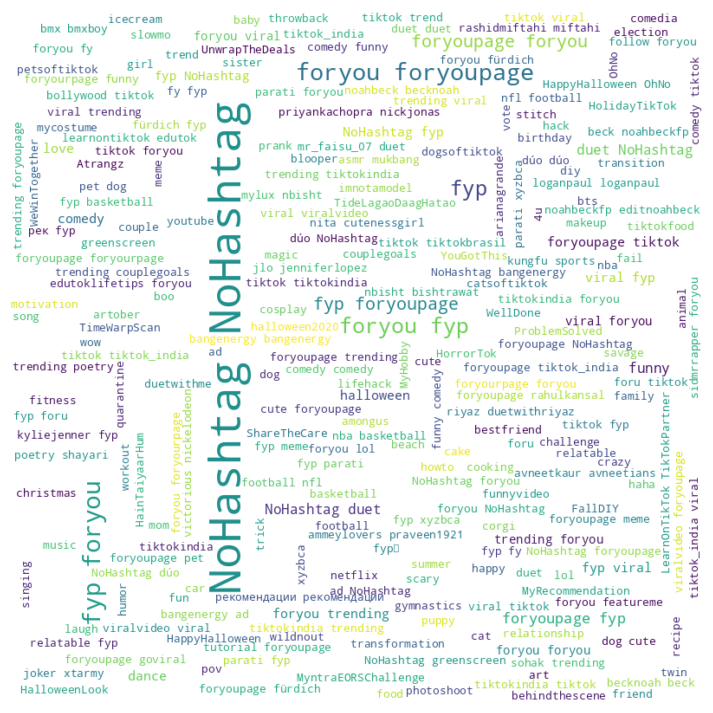

In [80]:
wordcloud = WordCloud(max_font_size=50, max_words=250, background_color="white", repeat=False, width=800, height=800).generate(text)

plt.figure(figsize = (16,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("hashtag_wordcloud.png")